# Visualizing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
avocados = pd.read_pickle("avoplotto.pkl")

In [7]:
print(avocados.head())

         date          type  year  avg_price   size     nb_sold
0  2015-12-27  conventional  2015       0.95  small  9626901.09
1  2015-12-20  conventional  2015       0.98  small  8710021.76
2  2015-12-13  conventional  2015       0.93  small  9855053.66
3  2015-12-06  conventional  2015       0.89  small  9405464.36
4  2015-11-29  conventional  2015       0.99  small  8094803.56


In [4]:
avocados.describe()

,year,avg_price,nb_sold
count,1014.000000,1014.000000,1.014000e+03
mean,2016.147929,1.319024,4.167774e+06
std,0.940380,0.295168,5.596185e+06
min,2015.000000,0.760000,8.343000e+02
25%,2015.000000,1.040000,1.320755e+05
50%,2016.000000,1.325000,4.232327e+05
75%,2017.000000,1.540000,1.019066e+07
max,2018.000000,2.090000,2.274362e+07


In [6]:
avocados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       1014 non-null   object 
 1   type       1014 non-null   object 
 2   year       1014 non-null   int64  
 3   avg_price  1014 non-null   float64
 4   size       1014 non-null   object 
 5   nb_sold    1014 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 47.7+ KB


In [8]:
# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()

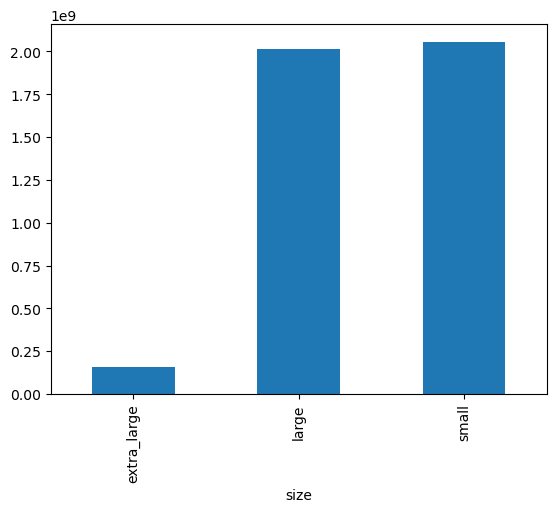

In [9]:
# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()

In [11]:
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby("date")["nb_sold"].sum()

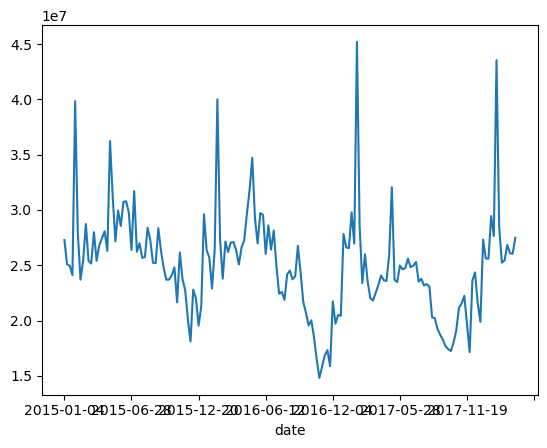

In [12]:
# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line")

# Show the plot
plt.show()

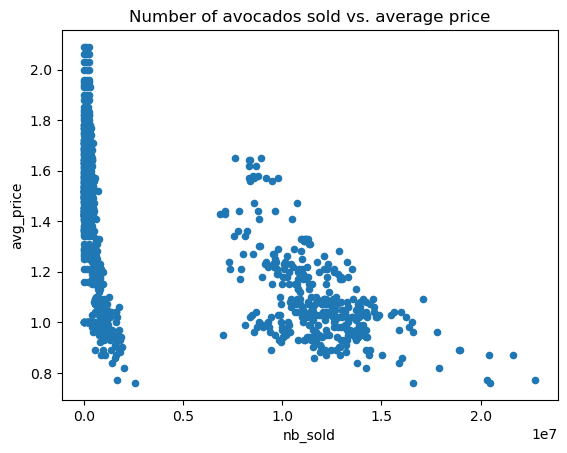

In [13]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(x="nb_sold", y="avg_price", title="Number of avocados sold vs. average price", kind="scatter")

# Show the plot
plt.show()

## Layering Plots

Subset avocados for the conventional type, and the average price column. Create a histogram.

<AxesSubplot:>

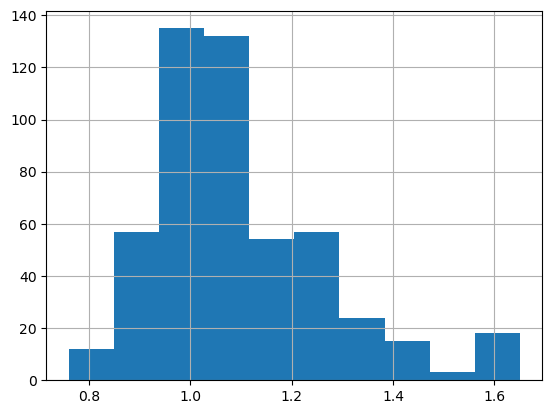

In [14]:
# Histogram of conventional avg_price 
avocados[avocados["type"]=="conventional"]["avg_price"].hist()

Create a histogram of avg_price for organic type avocados.

<AxesSubplot:>

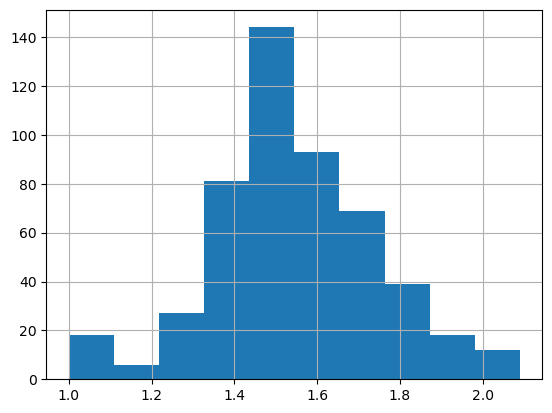

In [15]:
# Histogram of organic avg_price
avocados[avocados["type"]=="organic"]["avg_price"].hist()

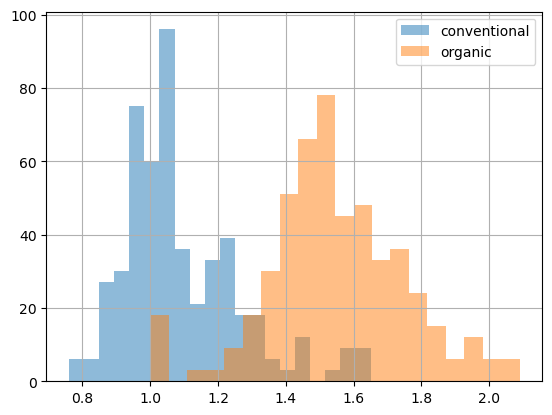

In [19]:
# Modify histogram transparency to 0.5 
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)

# Modify histogram transparency to 0.5
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)

# Add a legend
plt.legend(["conventional", "organic"])

# Show the plot
plt.show()

# Missing values

## Detecting missing values

In [20]:
avocados.isna()

,date,type,year,avg_price,size,nb_sold
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1009,False,False,False,False,False,False
1010,False,False,False,False,False,False
1011,False,False,False,False,False,False
1012,False,False,False,False,False,False


## Detecting any missing data

In [21]:
avocados.isna().any()

date         False
type         False
year         False
avg_price    False
size         False
nb_sold      False
dtype: bool

If any of the values has True that means that vaiable has missing data

## Counting missing values

In [23]:
avocados.isna().sum()

date         0
type         0
year         0
avg_price    0
size         0
nb_sold      0
dtype: int64

## Plotting missing values

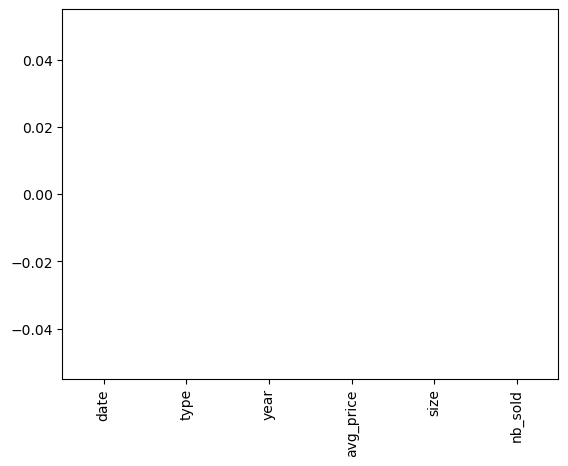

In [25]:
avocados.isna().sum().plot(kind="bar")
plt.show()

## Removing missing values

In [28]:
avocados.dropna()

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56
...,...,...,...,...,...,...
1009,2018-02-04,organic,2018,1.53,extra_large,1703.52
1010,2018-01-28,organic,2018,1.61,extra_large,1270.61
1011,2018-01-21,organic,2018,1.63,extra_large,1490.02
1012,2018-01-14,organic,2018,1.59,extra_large,1580.01


This is not ideal always

## Replacing missing values

In [27]:
avocados.fillna(0)

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56
...,...,...,...,...,...,...
1009,2018-02-04,organic,2018,1.53,extra_large,1703.52
1010,2018-01-28,organic,2018,1.61,extra_large,1270.61
1011,2018-01-21,organic,2018,1.63,extra_large,1490.02
1012,2018-01-14,organic,2018,1.59,extra_large,1580.01


# Creating Dataframes

## Dictionaries

In [30]:
my_dict = {
    "title": "Charlotte's Web",
    "author": "E.B. White",
    "published": 1952,
}

In [31]:
my_dict["title"]

"Charlotte's Web"

We'll discuss two ways of creating dataframes:
* From a list of dictionaries
* From a dictionary of lists

## From a list of dictionaries

* Constructed row by row

In [32]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-03    10376832     7835071
1  2019-11-10    10717154     8561348


## From a dictionary of lists

* Construsted column by column

Here each key = column name  
Value = list of column values

In [33]:
# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17","2019-12-01"],
  "small_sold": [10859987,9291631],
  "large_sold": [7674135,6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)

         date  small_sold  large_sold
0  2019-11-17    10859987     7674135
1  2019-12-01     9291631     6238096


## Reading and writing CSVs

Use .to_csv to save a DataFrame to a CSV  
Eg:  
airline_totals_sorted.to_csv("airline_totals_sorted.csv")